In [2]:
import numpy as np
import pandas as pd
import cv2

from sklearn.datasets import fetch_openml #veri kümesi için kullanılır
from skimage.filters import threshold_otsu #pip install scikit-image, bu fonksiyon optimal bir eşik değeri belirtir
"""
threshold_otsu fonksiyonu; görüntülerimizde pixel değerlerimiz var bunlar için optimal bir eşik değeri üretecek 
ve bu değerinaltinda kalanlar belli bir sinifa atamasi yapilacak, üstünde kalanlarsa belirli bir sinifa 
atamasi yapilacak.
"""
#görüntü üzerindeki piksel değerlerini 2 sinifa böler, eşik değerinin üstü bir 
#sinifa atanir, eşik değerinin alti bir sinifa atanir.

from sklearn.model_selection import train_test_split #veri kümemizi eğitim ve test olarak ikiye böler

from sklearn.tree import DecisionTreeClassifier #karar ağaci siniflandirma modeli
from sklearn.ensemble import RandomForestClassifier #rastgele orman siniflandirma modeli

from sklearn.metrics import accuracy_score #başarım ölçütü
from sklearn.metrics import f1_score #başarım ölçütü

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #confusion matrix hesaplama ve gösterim

import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# MNIST veri kümesi yüklenmesi
mnist = fetch_openml('mnist_784',version=1)

In [5]:
x = mnist["data"] #verilerimiz
y = mnist["target"] #etiketlerimiz

In [6]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
28*28

784

In [8]:
len(x)

70000

In [9]:
x[x["pixel775"]!=0] #0 olmayan pixellerimizi de görebiliyoruz

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,223.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.0,231.0,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,253.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,61.0,253.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
y #etiketlerimiz

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [11]:
y.unique().tolist()

['5', '0', '4', '1', '9', '2', '3', '6', '7', '8']

In [13]:
#her sınıfımızda ne kadar veri var ona bakalım
pd.DataFrame(y).groupby("class").size()

class
0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
dtype: int64

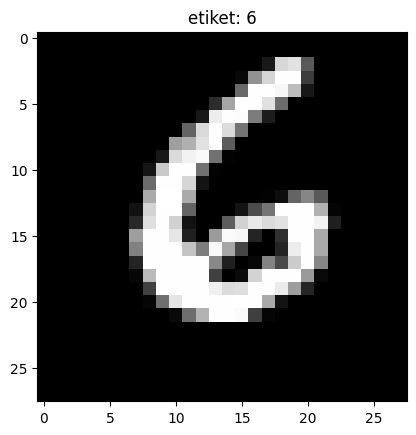

In [16]:
x = mnist["data"].to_numpy()
y = mnist["target"]

#örnek bir görüntü seçme
image_index = 90
image = x[image_index].reshape(28,28)

#görüntüyü gösterme
plt.imshow(image,cmap="gray")
plt.title("etiket: "+ str(y[image_index]))
plt.show()

In [18]:
image.shape

(28, 28)

In [19]:
x_clean=[]

for image in x:
    threshold_value = threshold_otsu(image)
    binary_image = image>threshold_value
    x_clean.append(binary_image.flatten())

In [ ]:
x_clean[5]

In [21]:
#veriyi train ve test olarak bölme
x_train, x_test, y_train, y_test = train_test_split(x_clean,y,test_size=0.2,random_state=42)

In [23]:
len(x_train) #eğitim verileri

56000

In [24]:
len(y_train) #x_train verimizin etiketleri 

56000

In [27]:
(70000*80)/100

56000.0

In [28]:
len(x_test) #test verileri

14000

In [31]:
len(y_test) #x_test verimizin etiketleri

14000

In [32]:
(70000*20)/100

14000.0

In [33]:
## makine öğrenmesi
model = DecisionTreeClassifier()

#model eğitimi
model.fit(x_train,y_train)

#test veri kümesi üzerinden tahmin yapılması
y_pred = model.predict(x_test) 

In [36]:
y_pred #test verimizin etiketleri

array(['8', '4', '2', ..., '2', '7', '1'], dtype=object)

In [ ]:
y_test #test verimizin gerçek etiketleri

In [34]:
accuracy = accuracy_score(y_test,y_pred) #test verimizin gerçek çıktısı vs modelimizin çıktılarını karşılaştırıyoruz
print("accuracy: ", accuracy)

accuracy:  0.8682857142857143


In [35]:
f1_score = f1_score(y_test,y_pred,average="weighted")
print("f1_score: ", f1_score)

f1_score:  0.8680199595480813


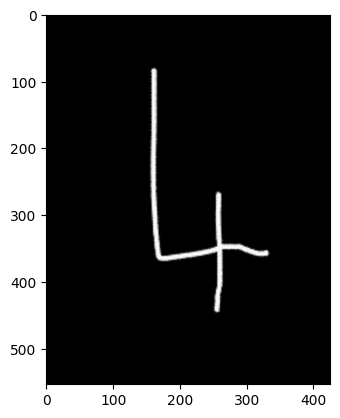

In [37]:
# dişaridan örnek veri ile test edilme

image = cv2.imread("data/dort.png")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(image)

In [39]:
image.shape

(554, 426, 3)

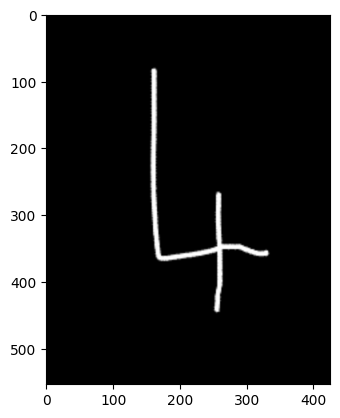

In [40]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(image,cmap="gray")

In [42]:
image.shape #tek kanala çevirdik çünkü bizim modelimizdeki verilerimiz hem tek kanallı hem de modelimiz 
#gray formatındaki verilerle eğitildi.

(554, 426)

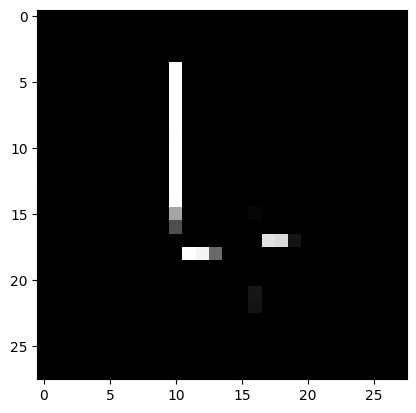

In [44]:
image = cv2.resize(image,(28,28)) #28x28 (width,height) formatına getiriyoruz örnek resmimizi
plt.imshow(image,cmap="gray")

In [46]:
image.shape

(28, 28)

In [47]:
#bundan önceki verilerimizi threshold fonksiyonu ile belirli bir eşik değerine göre true ya da false diye işaretlemiştik.
#aynısı örnek olarak dışarıdan verdiğimiz tek bir resme dahi yapmalıyız ve ön adım işlemlerinden geçirmeliyiz.
image_array = np.array(image)
 
threshold_value = threshold_otsu(image_array)
binary_image = image>threshold_value
image_array = binary_image.flatten()

image_array = image_array.reshape(1,-1) #1 boyutlu vektör çevirme

In [48]:
image_array

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False,
      

In [50]:
prediction=model.predict(image_array)
print("tahmin: ", prediction)

tahmin:  ['4']


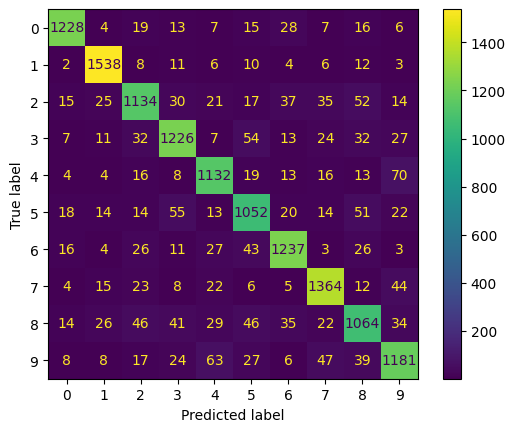

In [51]:
cm=confusion_matrix(y_test,y_pred,labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

<hr>

### _Confisuon matrix yorumu_
##### -Modelimiz `en iyi` tahminini 1de yapmıştır. 1'i 1 olarak tahmin ettiği 1538 adet veri vardır burada da `başarı` oranı yüksektir.
##### -Modelimiz `en kötü` tahminini ise 8'de yapmıştır. 8'i 8 olarak tahim ettiği 1064 adet veri vardır sadece. 8'i 2 ve 5e benzetmiştir.
* *0'lari 0 olarak tahmin ettiği sayi => 1228 kez*
* *0'lari 1 olarak tahmin ettiği sayi => 4   kez*
* *0'lari 2 olarak tahmin ettiği sayi => 19  kez*
* *0'lari 3 olarak tahmin ettiği sayi => 13  kez*
* *0'lari 4 olarak tahmin ettiği sayi => 7   kez*
* *0'lari 5 olarak tahmin ettiği sayi => 15  kez*
* *0'lari 6 olarak tahmin ettiği sayi => 28  kez*
* *0'lari 7 olarak tahmin ettiği sayi => 7   kez*
* *0'lari 8 olarak tahmin ettiği sayi => 16  kez*
* *0'lari 9 olarak tahmin ettiği sayi => 6   kez*
<hr>

In [53]:
from sklearn import metrics #aşağidaki kodda "'numpy.float64' object is not callable" hatasi aldiğimiz için 
#bu şekilde çözüyoruz

In [54]:
#ön işlem adımı yapmadan bir sınıflandırma işlemi gerçekleştirelim.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## makine öğrenmesi
model = DecisionTreeClassifier()#karar ağacı algoritmasını kullanıyoruz.

#model eğitimi
model.fit(x_train,y_train)

#test veri kümesi üzerinden tahmin yapılması
y_pred = model.predict(x_test) 

accuracy = accuracy_score(y_test,y_pred) #test verimizin gerçek çıktısı vs modelimizin çıktılarını karşılaştırıyoruz
print("accuracy: ", accuracy)

f1_score = metrics.f1_score(y_test,y_pred,average="weighted") #f1_scoreu, metrics.f1_score olarak çeviriyoruz.
print("f1_score: ", f1_score)

accuracy:  0.8732857142857143
f1_score:  0.873193437388306


In [ ]:
"""
threshold fonks. uyguladiktan sonra sonuçlarimiz:
accuracy:  0.8682857142857143
f1_score:  0.8680199595480813 
threshold fonks. uygulamadan sonuçlarimiz:
accuracy:  0.8732857142857143
f1_score:  0.873193437388306 

threshold ve ön işlem uygulamiştik ve daha kötü sonuç çikardi ve bu yüzden bu adimi uygulamaktan vazgeçip 
veri okuyup eğittiğimizde daha iyi sonuç verdiği için bu şekilde kullanmaya devam edeceğiz."""


In [55]:
# random forest model

#ön işlem adımı yapmadan bir sınıflandırma işlemi gerçekleştirelim.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## makine öğrenmesi
model = RandomForestClassifier()#karar ağacı algoritmasını kullanıyoruz.

#model eğitimi
model.fit(x_train,y_train)

#test veri kümesi üzerinden tahmin yapılması
y_pred = model.predict(x_test) 

accuracy = accuracy_score(y_test,y_pred) #test verimizin gerçek çıktısı vs modelimizin çıktılarını karşılaştırıyoruz
print("accuracy: ", accuracy)

f1_score = metrics.f1_score(y_test,y_pred,average="weighted") #f1_scoreu, metrics.f1_score olarak çeviriyoruz.
print("f1_score: ", f1_score)

accuracy:  0.9674285714285714
f1_score:  0.9674130117045999


# _Random forest algoritmasi karar ağaci algoritmasindan daha iyi bir sonuç çikardiğini görebiliyoruz._